In [1]:
pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [7]:
dbcon=pymysql.connect(host="localhost", user="root", password="", database="banking_case") 
#make a connection

In [9]:
dbcon 
#declaring if the connection is made

In [21]:
#getting data from a sql database and converting it to a pandas database
df=pd.read_sql_query("select * from customer", dbcon, parse_dates=True)

/var/folders/ff/_gklpc156ld26gn9hy_1k2_40000gn/T/ipykernel_18076/3531953894.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query("select * from customer", dbcon, parse_dates=True)


In [23]:
df.head()

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,bank_deposits,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,genderid,iaid
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [25]:
df.shape

(3000, 25)

In [33]:
df.info()
#to check if there are any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   client_id                 3000 non-null   object 
 1   name                      3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   location_id               3000 non-null   int64  
 4   joined_bank               3000 non-null   object 
 5   banking_contact           3000 non-null   object 
 6   nationality               3000 non-null   object 
 7   occupation                3000 non-null   object 
 8   fee_structure             3000 non-null   object 
 9   loyalty_classification    3000 non-null   object 
 10  estimated_income          3000 non-null   float64
 11  superannuation_savings    3000 non-null   float64
 12  amount_of_credit_cards    3000 non-null   int64  
 13  credit_card_balance       3000 non-null   float64
 14  bank_loa

In [35]:
df.describe()
#descriptive statistics of the dataset

,age,location_id,estimated_income,superannuation_savings,amount_of_credit_cards,credit_card_balance,bank_loans,bank_deposits,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,genderid,iaid
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [39]:
df['estimated_income'].min()

15919.48

In [47]:
#converting numerical data to categorical- fitting them into windows of income
bins=[0, 100000, 300000, float('inf')]
#float('inf'): floating-point value representing infinity
labels=['low', 'med', 'high']

#pd.cut is used to divide continuous data to categories
#right=True: Intervals include the right endpoint.
df['income_band']=pd.cut(df['estimated_income'], bins=bins, labels=labels, right=False)

In [49]:
df.head()

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,genderid,iaid,income_band
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1,low
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2,med
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3,med
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4,high
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5,med


<Axes: xlabel='income_band'>

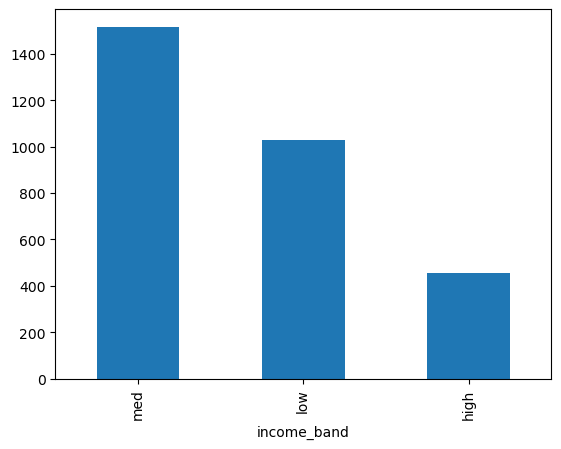

In [51]:
df['income_band'].value_counts().plot(kind='bar')

In [69]:
#examine the distribution of unique categories in categorical columns
cat_cols=df[['fee_structure',
       'loyalty_classification',
'amount_of_credit_cards','properties_owned',
       'risk_weighting', 'brid', 'genderid', 'iaid', 
'income_band', 'nationality', 'occupation']]

print('Value counts:')
for col in cat_cols:
    print(df[col].value_counts())

Value counts:
fee_structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64
loyalty_classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64
amount_of_credit_cards
1    1922
2     765
3     313
Name: count, dtype: int64
properties_owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64
risk_weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64
brid
3    1352
1     660
2     495
4     493
Name: count, dtype: int64
genderid
2    1512
1    1488
Name: count, dtype: int64
iaid
1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64
income_band
med     1517
low     1027
high     456
Name: count, dtype: int64
nationality
European      1309
Asian          754
American       507
Australian     254

In [55]:
df.columns

Index(['client_id', 'name', 'age', 'location_id', 'joined_bank',
       'banking_contact', 'nationality', 'occupation', 'fee_structure',
       'loyalty_classification', 'estimated_income', 'superannuation_savings',
       'amount_of_credit_cards', 'credit_card_balance', 'bank_loans',
       'bank_deposits', 'checking_accounts', 'saving_accounts',
       'foreign_currency_account', 'business_lending', 'properties_owned',
       'risk_weighting', 'brid', 'genderid', 'iaid', 'income_band'],
      dtype='object')

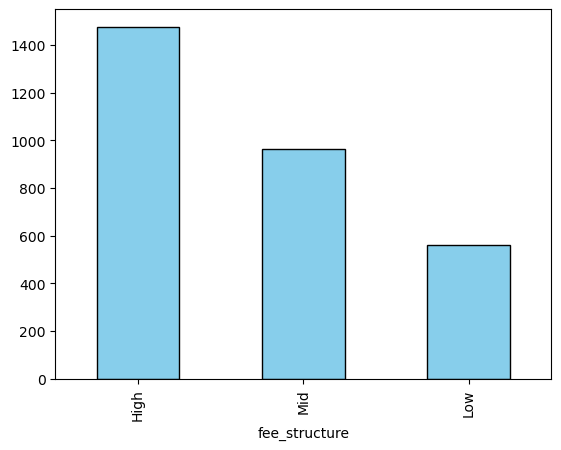

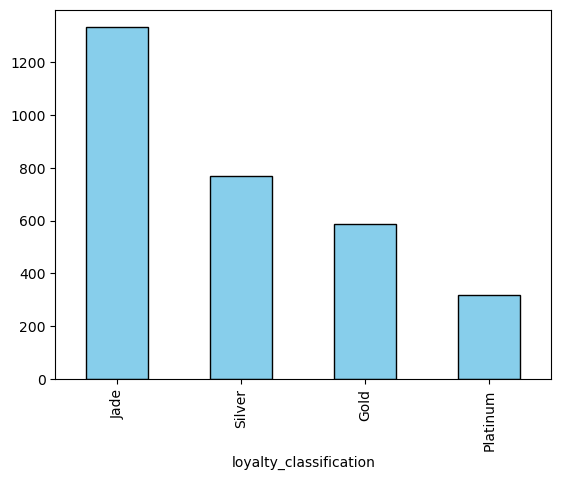

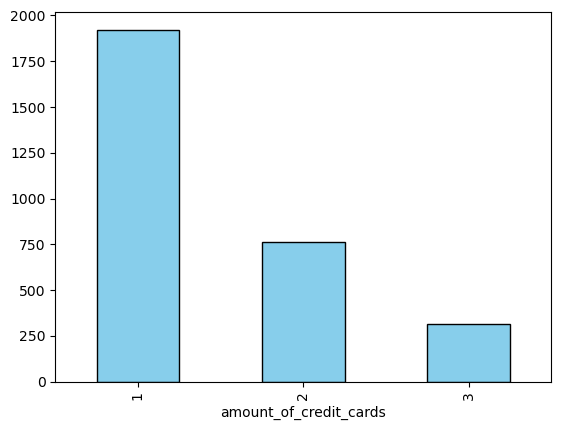

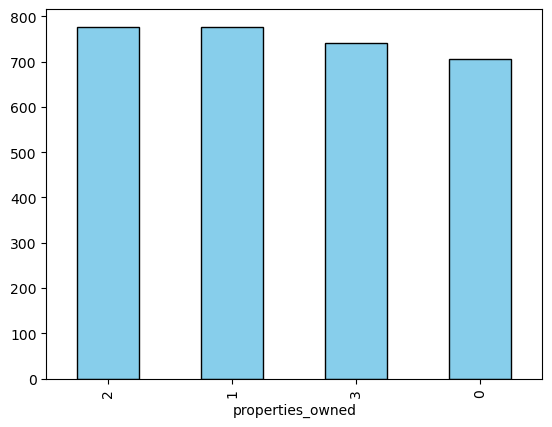

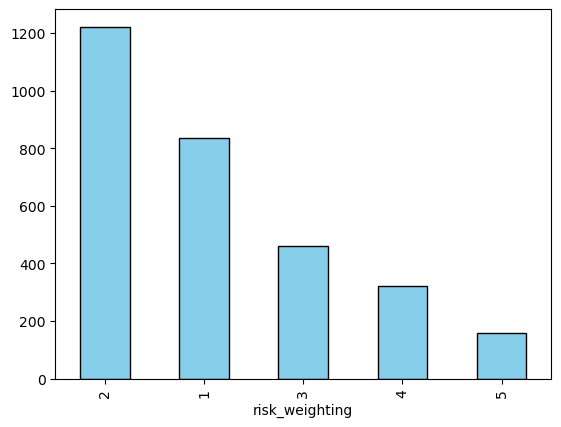

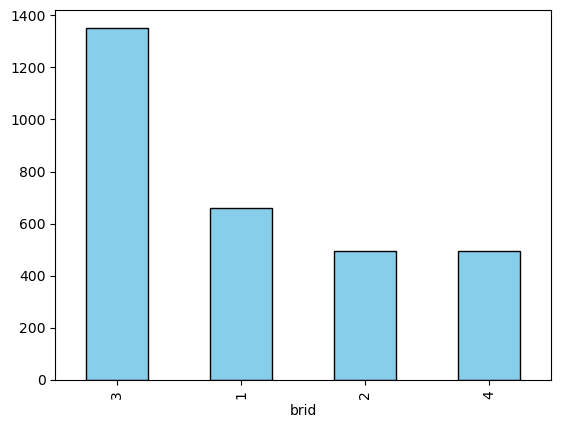

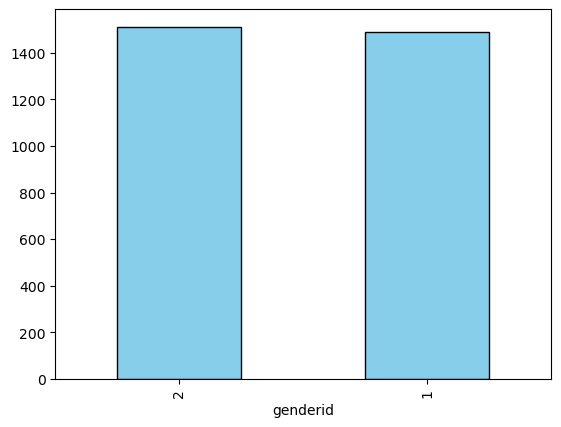

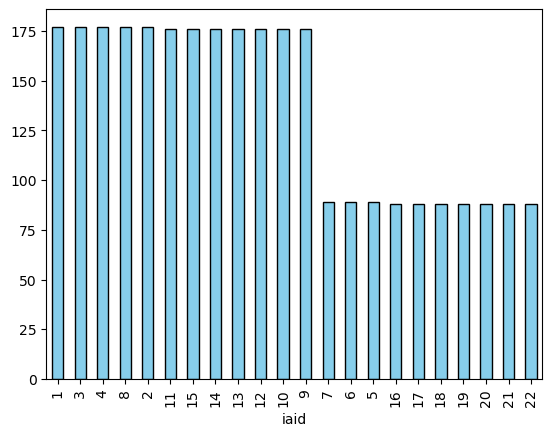

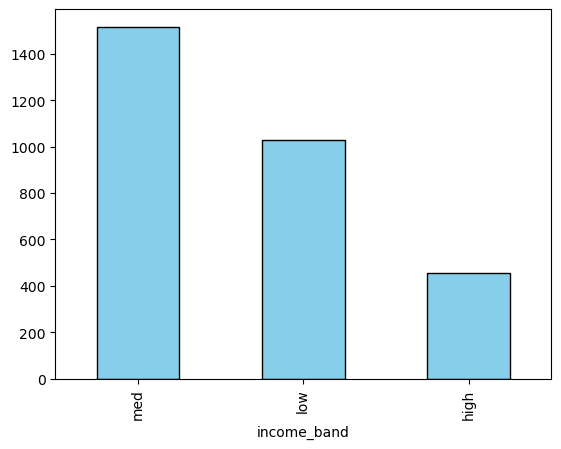

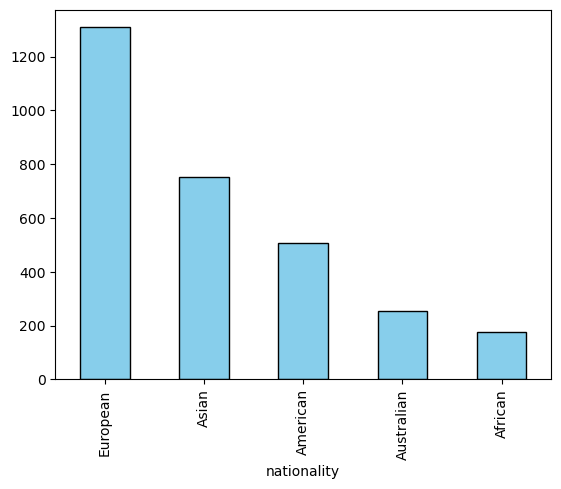

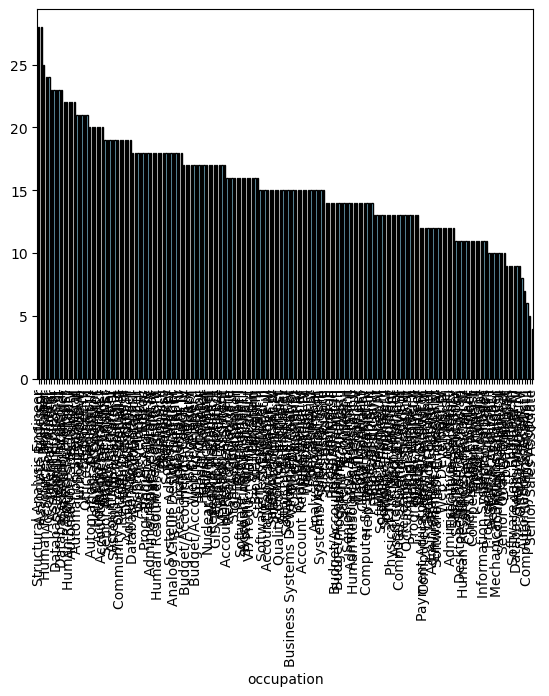

In [78]:
#univariate analysis
for col in cat_cols:
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.show()

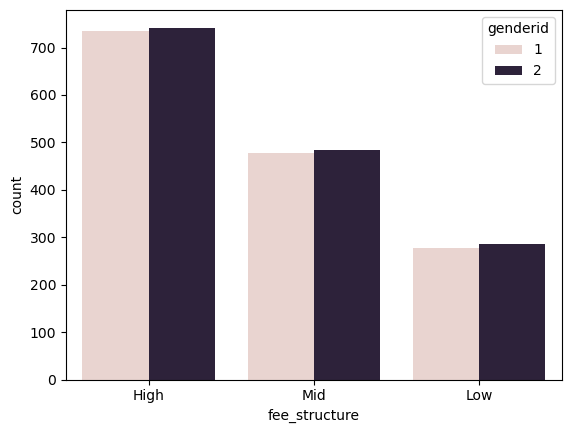

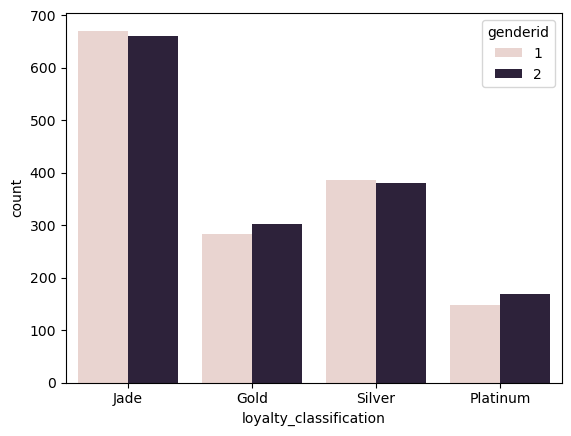

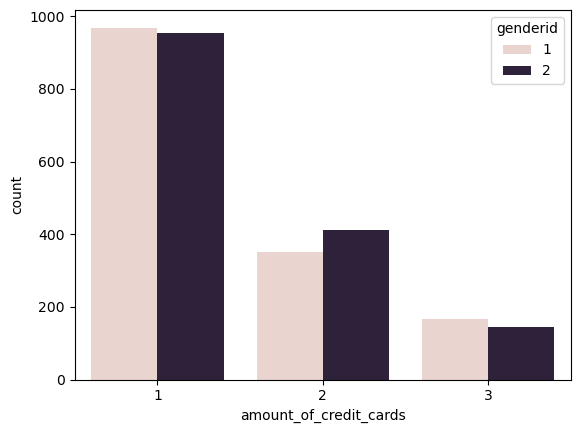

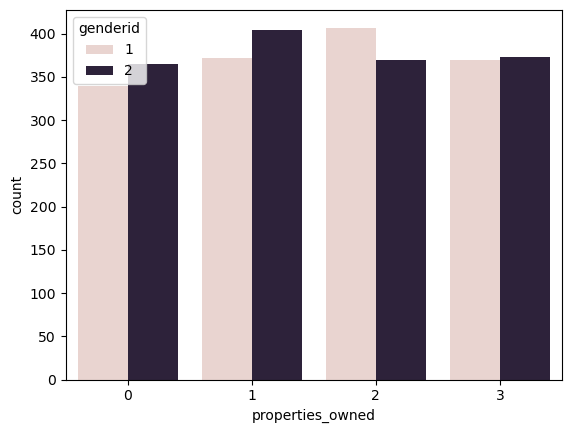

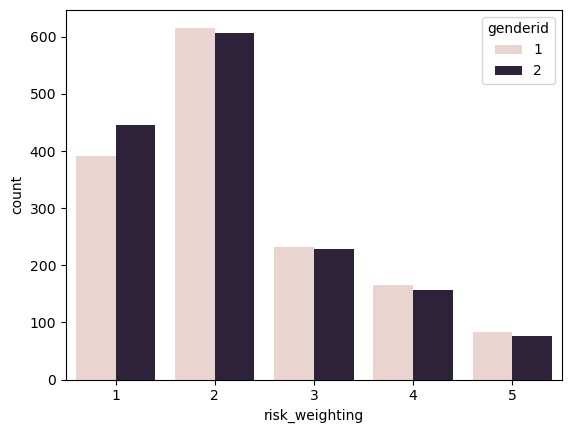

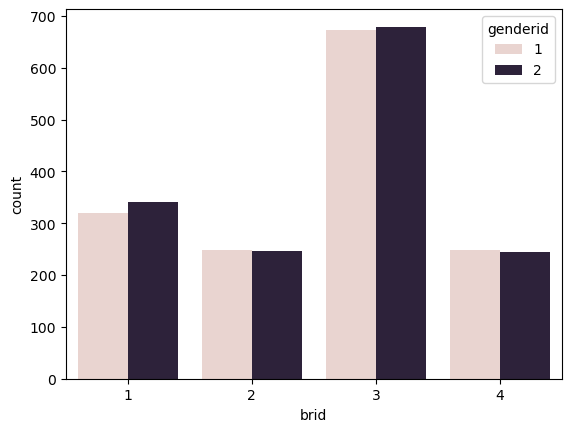

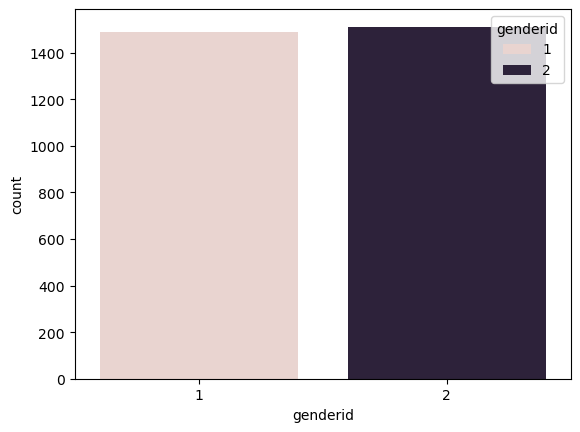

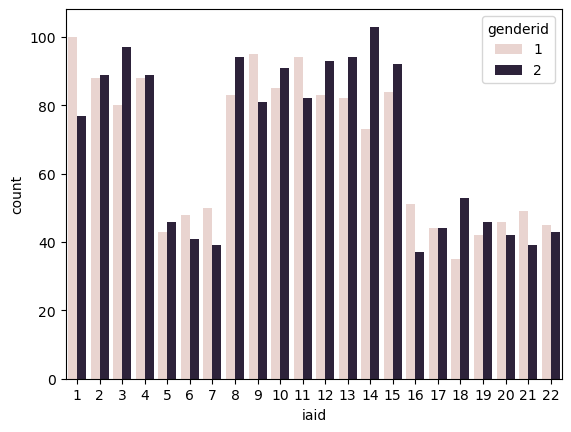

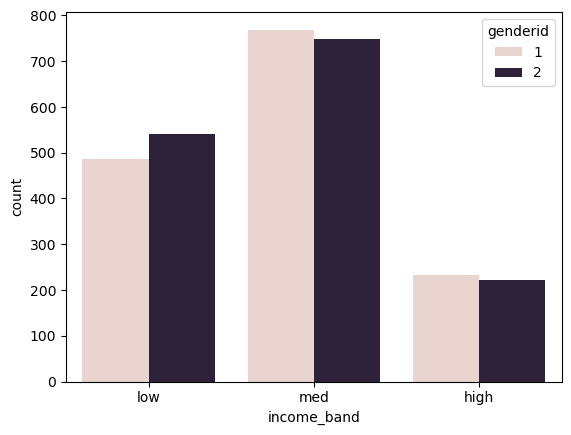

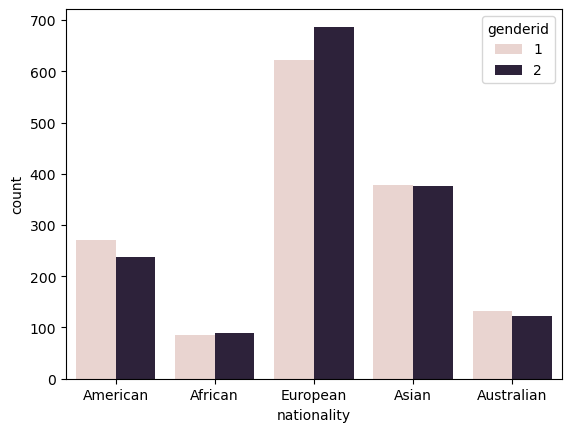

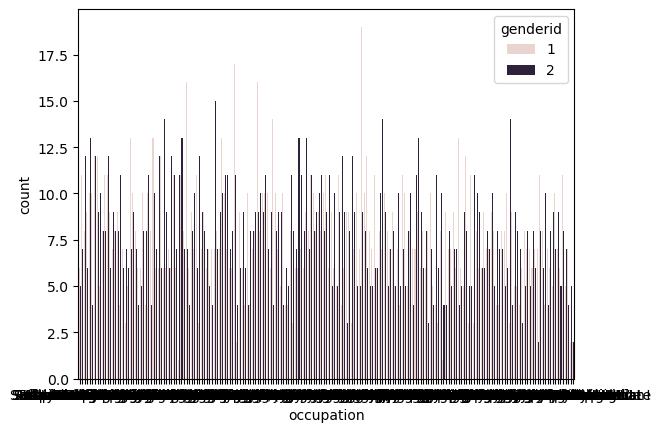

In [82]:
#bivariate anlalysis

for col in cat_cols:
    sns.countplot(data=df, x=col, hue='genderid')
    plt.show()

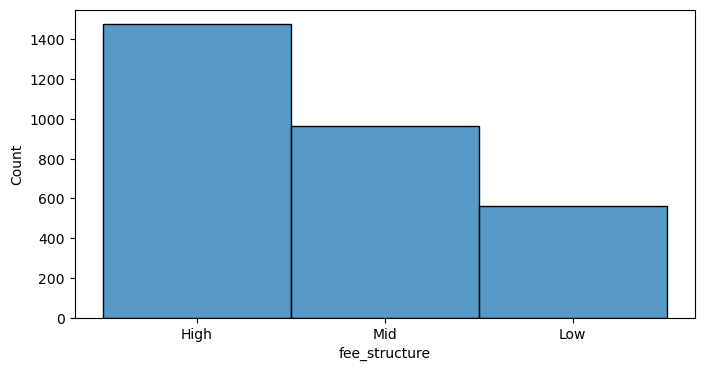

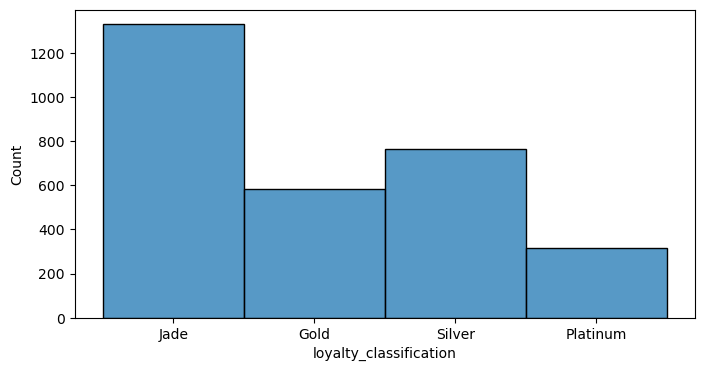

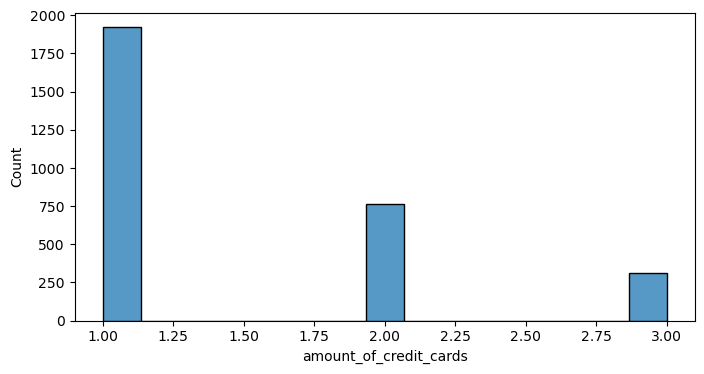

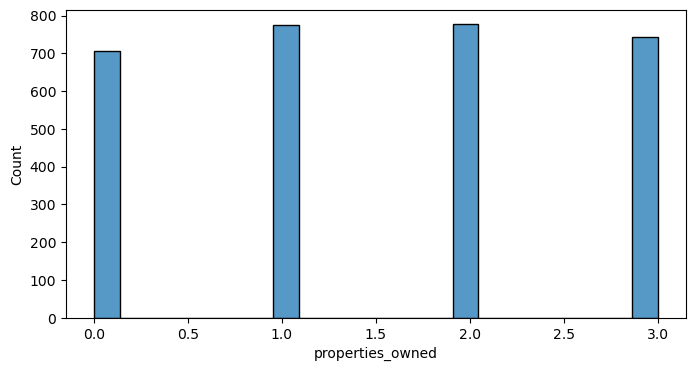

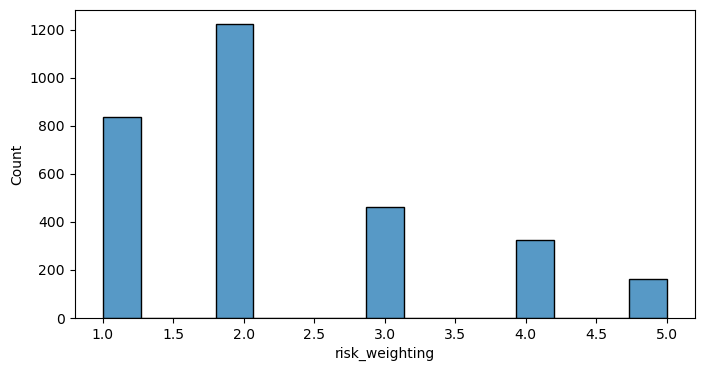

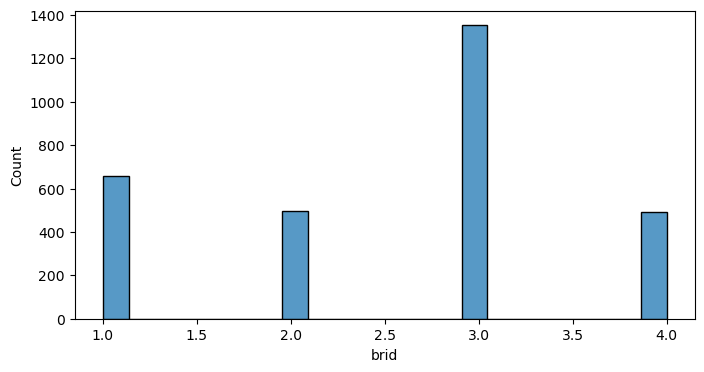

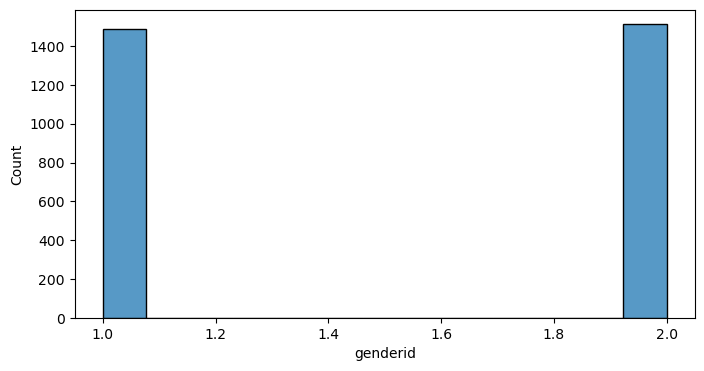

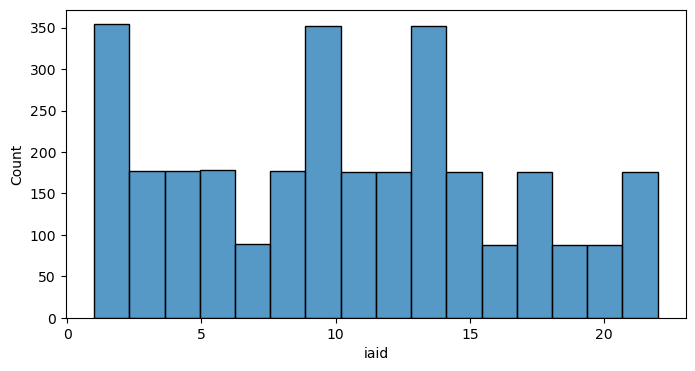

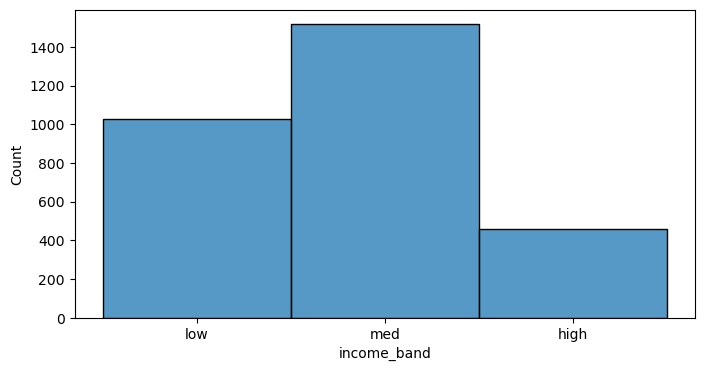

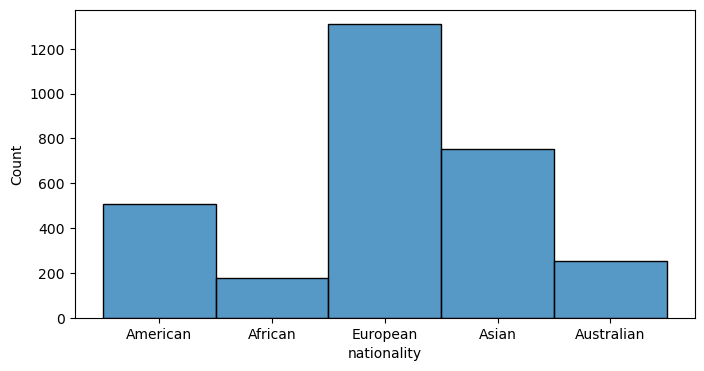

In [95]:
#histoplots of every column plotted with its value counts

for col in cat_cols:
    if col == 'occupation':  # Skip comparing occupation to itself
        continue
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.show()

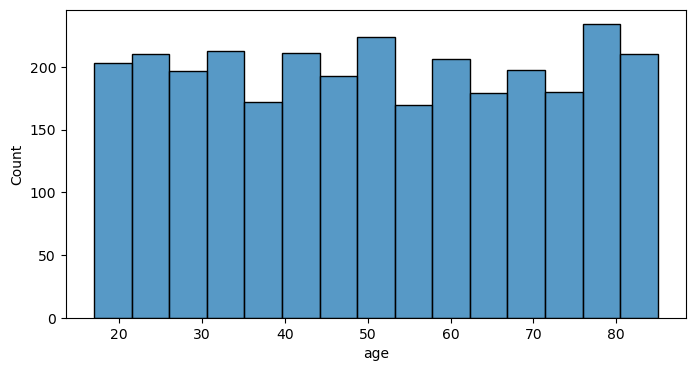

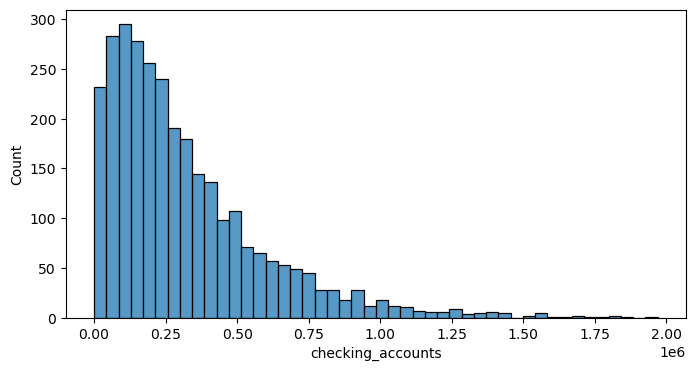

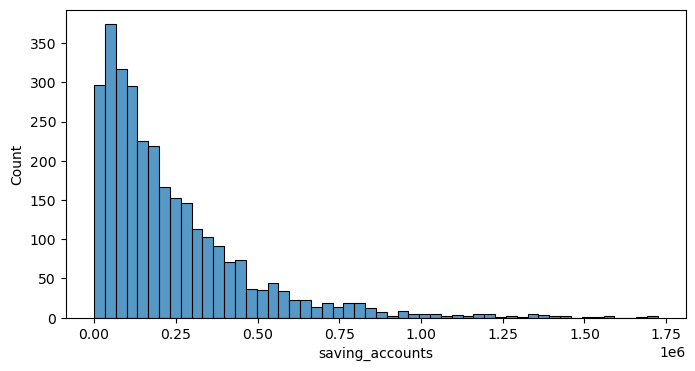

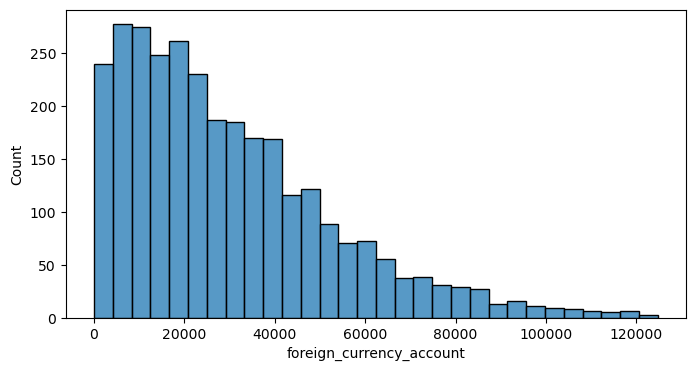

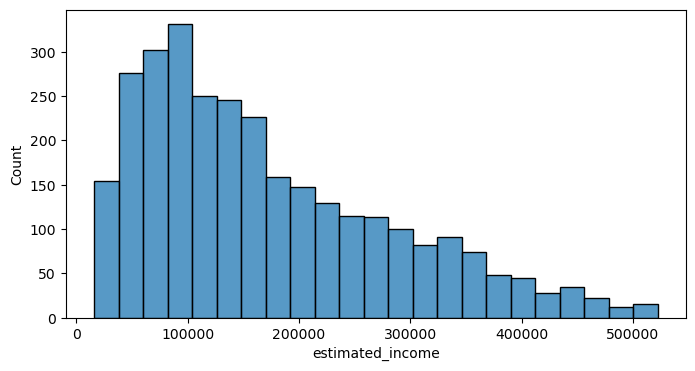

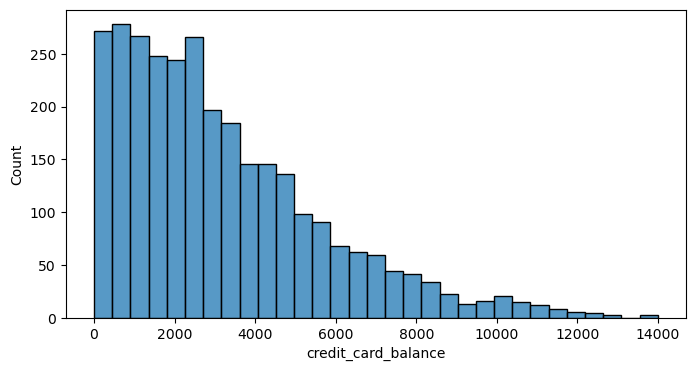

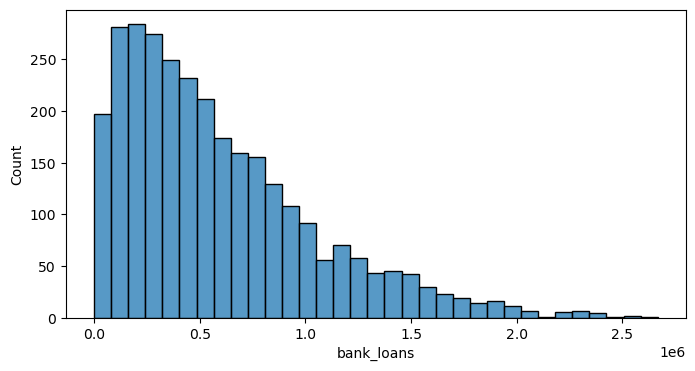

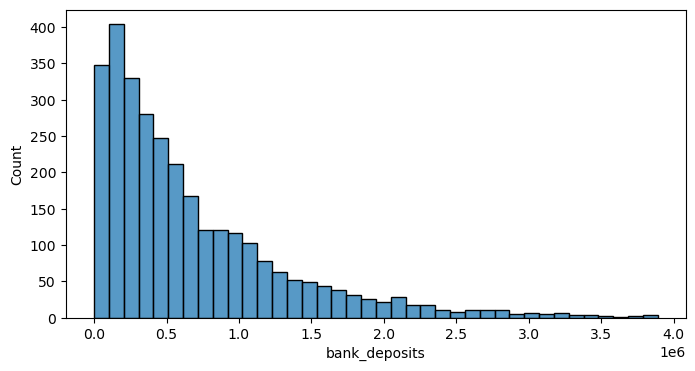

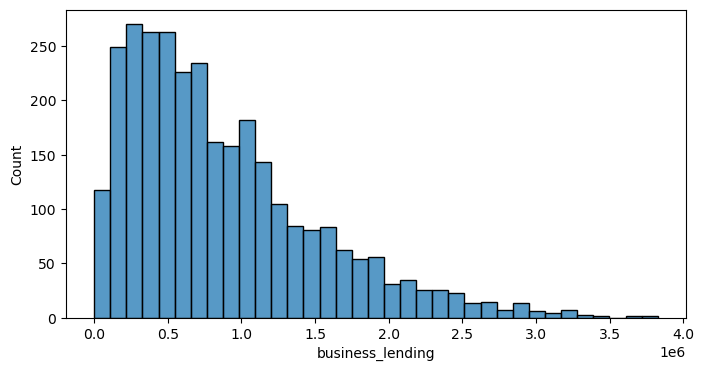

In [115]:
#numerical analysis
num_cols=['age','checking_accounts', 'saving_accounts',
       'foreign_currency_account', 'estimated_income', 'credit_card_balance', 'bank_loans',
       'bank_deposits', 'business_lending']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.show()

#all are right skewed

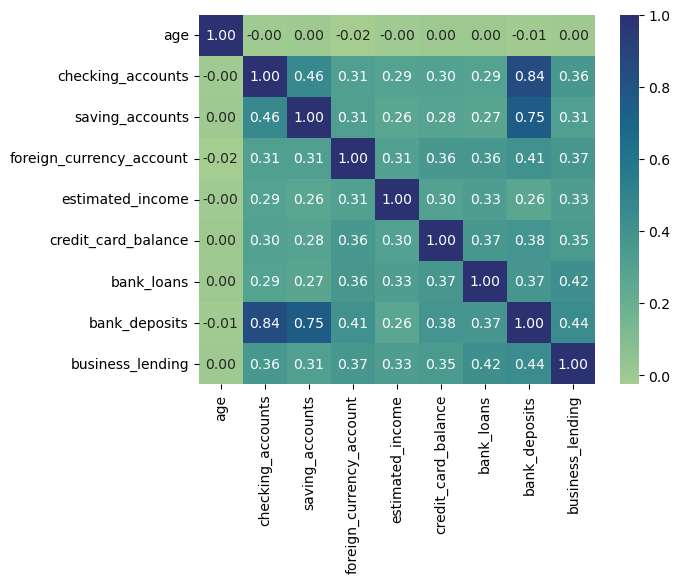

In [119]:
#heatmaps

correlation_matrix=df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='0.2f')
plt.show()

Insights:
1. Strongest correlation between bank deposit and checking, savings account
2. Customers who have high amounts stored in one account, possibly have the same in other accounts as well

In [122]:
df.columns


Index(['client_id', 'name', 'age', 'location_id', 'joined_bank',
       'banking_contact', 'nationality', 'occupation', 'fee_structure',
       'loyalty_classification', 'estimated_income', 'superannuation_savings',
       'amount_of_credit_cards', 'credit_card_balance', 'bank_loans',
       'bank_deposits', 'checking_accounts', 'saving_accounts',
       'foreign_currency_account', 'business_lending', 'properties_owned',
       'risk_weighting', 'brid', 'genderid', 'iaid', 'income_band'],
      dtype='object')

In [124]:
df.head()

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,genderid,iaid,income_band
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1,low
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2,med
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3,med
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4,high
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5,med
